# Обучение регрессии $-$ оптимизация

Обучающая выборка: $X^l = (x_i, y_i)_{i=1}^l, \ x_i \in R^n, y_i \in R$

- Модель регрессии $-$ линейная:

\begin{equation}
a(x, w) = \langle x, w\rangle = \sum_{i = 1}^nf_i(x)w_i, \ w \in R^n
\end{equation}
- Функция потерь:

$$
L(a, y) = (a-y)^2
$$
- Метод обучения $-$ метод наименьших квадратов:

$$
MSE = Q(w) = \dfrac{1}{l}\sum_{i=1}^l(a(x_i, w) - y_i)^2 \to \min_w
$$

$$
MAE = Q(w) =  \dfrac{1}{l}\sum_{i=1}^l|a(x_i, w) - y_i| \to \min_w
$$
- Проверка по тестовой выборке $X^k = (\tilde x_i, \tilde y_i)_{i=1}^k$:

$$
\tilde Q(w) = \dfrac{1}{k}\sum_{i=1}^k(a(\tilde x_i, w) - \tilde y_i)^2 \to \min_w
$$

$$
\tilde Q(w) = \dfrac{1}{k}\sum_{i=1}^k|a(\tilde x_i, w) - \tilde y_i| \to \min_w
$$

[MSE VS. MAE](https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d)


# Обучение классификации $-$ тоже оптимизация

Обучающая выборка: $X^l = (x_i, y_i)_{i=1}^l, \ x_i \in R^n, \ y_i \in \{-1, 1\}$

- Модель классификации $-$ линейная:

$$
a(x, w) = \sign \langle x, w\rangle
$$

- Функция потерь $-$ или ее апроксимация:

$$
L(a, y) = [y \langle x, w\rangle] \leq L(y \langle x, w\rangle)
$$

- Метод обучения $-$ минимизация эмпирического риска:

$$
Q(w) =\frac{1}{l} \sum_{i=1}^l [a(x_i, w)y_i < 0] \leq \sum_{i=1}^l L(y_i \langle x_i, w\rangle) \to \min_w
$$

- Проверка по тестовой выборке $X^k = (\tilde x_i, \tilde y_i)_{i=1}^k$:
$$
\tilde Q(w) = \frac{1}{k} \sum_{i=1}^k [a(\tilde x_i, w)\tilde y_i < 0]
$$

# Понятие отступа для разделяющих объектов

Разделяющий классификатор: $a(x, w) = \mathrm{sign}(g(x, w))$

$g(x, w)$ $-$ разделяющая (дискриминантная, desicion function) функция

$g(x, w) = 0$ $-$ уравнение разделяющей поверхности

$M_i(w) = g(x_i, w)y_i$ $-$ отступ (margin) объекта $x_i$

Если $M_i(w) < 0$, то алгоритм $a(x, w)$ ошибается на $x_i$

Если ранжировать объекты по возрастанию отступов $M_i(w)$:

![](margin.png)

# Непрерывные аппроксимации пороговой функции потерь

Часто используемые непрерывные функции потерь $L(M)$

$V(M) = (1 - M)_+$ $-$ кусочно-линейная (SVM)

$H(M) = (-M)_+$ $-$ кусочно линейная (Hebb's rule)

$L(M) = \log_2(1 + \exp(-M))$ $-$ логарифмическая $LgoReg$

$Q(M) = (1 - M)^2$ $-$ квадратичная ([FLD](http://rcs.chemometrics.ru/Tutorials/classification/Fisher.pdf))

$S(M) = 2(1 + \exp(M))^{-1}$ $-$ сигмоидная (ANN)

$E(M) = \exp(-M)$ $-$ эксполненциальная (AdaBoost)

$[M < 0]$ $-$ пороговая функция потерь

In [24]:
import numpy as np

@np.vectorize
def svm(x):
    return 1 - x if (1 - x) > 0.0 else 0.0

@np.vectorize
def hebb(x):
    return -x if x < 0 else 0.0

def logreg(x):
    return np.log2(1 + np.exp(-x))

def fld(x):
    return (1 - x) ** 2

def ann(x):
    return 2. / (1. + np.exp(x))

def mexp(x):
    return np.exp(-x)

@np.vectorize
def empiric(x):
    return 1.0 if x < 0 else 0.0

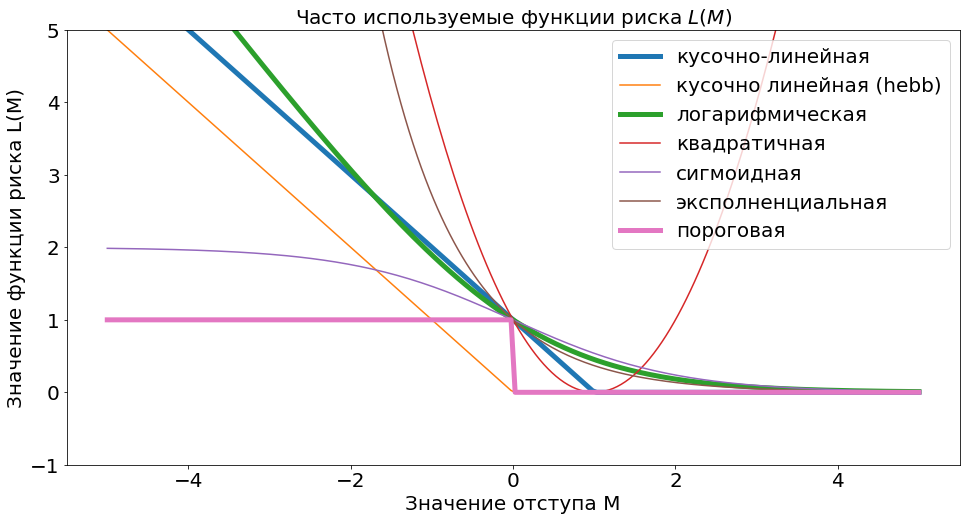

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16, 8))
x = np.linspace(-5, 5, 200)
plt.plot(x, svm(x), label='кусочно-линейная', linewidth=5)
plt.plot(x, hebb(x), label='кусочно линейная (hebb)')
plt.plot(x, logreg(x), label='логарифмическая', linewidth=5)
plt.plot(x, fld(x), label='квадратичная')
plt.plot(x, ann(x), label='сигмоидная')
plt.plot(x, mexp(x), label='эксполненциальная')
plt.plot(x, empiric(x), label='пороговая', linewidth=5)
plt.ylim(-1, 5)
plt.legend(fontsize=20), plt.title(u'Часто используемые функции риска $L(M)$', fontsize=20)
plt.xticks(fontsize=20), plt.xlabel(u'Значение отступа M', fontsize=20)
plt.yticks(fontsize=20), plt.ylabel(u'Значение функции риска L(M)', fontsize=20)
plt.show()

# Градиентный метод численной оптимизации

Минимизация эмпирического риска (регрессия, классификация):

$$
Q(w) = \sum_{i=1}^lL_i(w) \to \min_w
$$

Численная минимизация методом градиентного спуска:

$$
w^{0} :=  \text{начальное приближение;} \\
w^{(t+1)} := w^{(t)} - h \cdot \nabla Q(w^{(t)}), \ \nabla Q(w) = \left(\frac{\partial Q(w)}{\partial w_j}\right)^n_j=0,
$$

где $h$ $-$ шаг градиентного спуска, называемый также темпом обучения.

$$
w^{(t+1)} := w^{(t)} - h \sum_{i=1}^l\nabla L_i(w^{(t)})
$$

### Идея ускорения сходимости:

Брать $(x_i, y_i)$ по одному и сразу обновлять вектор весов. Это приведет к [методу стохастического градиента (SGD)](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D1%81%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B3%D0%BE_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%B0)

# Достоинства и недостатки SG

### Достоинства:

1. Легко реализуется
2. Легко обобщается на любые $g(x, w)$, $L(x, w)$
3. Возможно динамическое (потоковое) обучение
4. Подходит для задач с большими данными

### Недостатки:

1. Возможно переобучение
2. Возможно застревание в локальных экстремумах
3. Возможна расходимость или медленная сходимость
4. Подбор комплекса эвристик является искусством


# Проблема переобучения

### Возможные причины переобучения
- слишком мало объектов, слишком много признаков
- линйная зависимость (мультиколлинеарность) признаков:
    1. пусть построен классификатор: $a(x, w) = \mathrm{sign}\langle w, x\rangle$
    2. мультиколлинеарность: $\exists u \in R^{n+1}: \forall x_i \in X^l \ \langle w, x\rangle = 0$
    3. неединственность решения: $\forall \gamma \in R \ a(x, w)= \mathrm{sign}\langle w+\gamma u, x \rangle$
    
### Проявления переобучения:
- слишком большие веса разных |w_j| признаков
- неустойчивость дискриминантной функции $\langle w, x\rangle$
- $Q(X^l) \ll Q(X^k)$

### Основной способ уменьшить переобучение:
- регуляризация (сокращение весов, weight decay)

# Регуляризация (сокращение весов)

Идея ввести штраф за увеличение нормы вектора весов.
- L1-регуляризация (LASSO Тибширани, Least Absolute Shrinkage and Selection Operator) 
$$
\tilde L_i(w) = L_i(w) + \tau|w| = L_i(w) + \tau\sum_{i=1}^n|w_i| \to \min_w
$$
Позволяет провести отбор признаков, так как некотрые веса могут обнулиться.

- L2-регуляризация
$$
\tilde L_i(w) = L_i(w) + \dfrac{\tau}{2}||w||^2 = L_i(w) + \dfrac{\tau}{2}\sum_{i=1}^nw_i^2 \to \min_w
$$
- ElasticNet
$$
\tilde L_i(w) = L_i(w) + \dfrac{\tau_2}{2}||w||^2 + \tau_1|w| \to \min_w
$$

Метод подбора коэффициента $\tau$ $-$ скользящий контроль.


# Двухклассовая логистическая регрессия

Линейная модель классификации для двух классов $Y=\{-1, 1\}$:
$$
a(x) = \mathrm{sign}\langle w, x\rangle, \ x, w \in R^n
$$

Отступ $M = y\langle w, x\rangle$.

Логарифмическая функция потерь: $L(M) = \log(1 + \exp(-M))$.

Модель условной вероятности: $P(y|x, w) = \sigma(M) = \dfrac{1}{1 + \exp(-M)}$, где $\sigma(M)$ $-$ сигмоидная функция, важное свойство: $\sigma(M) + \sigma(-M) = 1$.

Задача обучения регуляризированной логистической регресии:
$$
L(w) = \dfrac{1}{l}\sum{\log\left(1 + \exp(-y_i\langle w, w_i\rangle)\right)} + \dfrac{\tau_2}{2}||w||^2 + \tau_1|w| \to \min_w
$$

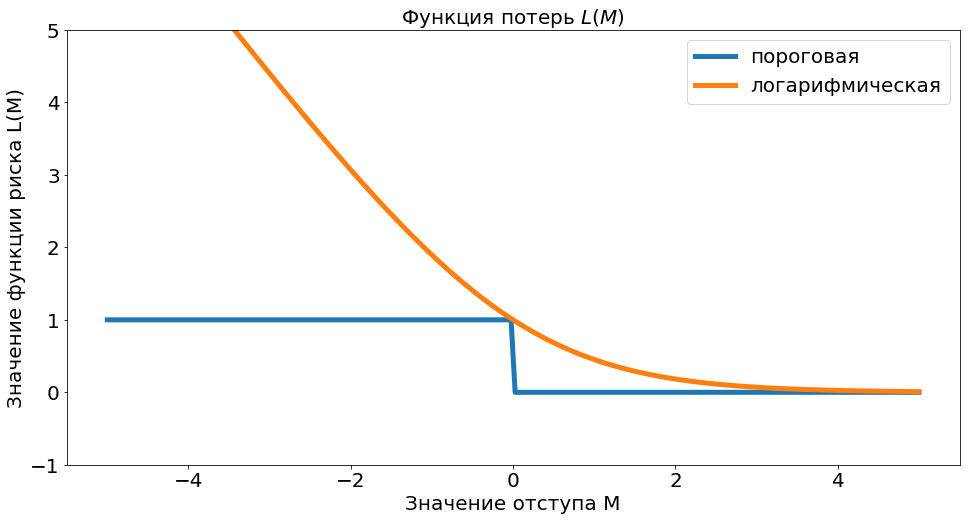

In [26]:
def sigmoid(x):
    return 1. / (1 + np.exp(-x))


plt.figure(figsize=(16, 8))
x = np.linspace(-5, 5, 200)
plt.plot(x, empiric(x), label='пороговая', linewidth=5)
plt.plot(x, logreg(x), label='логарифмическая', linewidth=5)
plt.ylim(-1, 5)
plt.legend(fontsize=20), plt.title(u'Функция потерь $L(M)$', fontsize=20)
plt.xticks(fontsize=20), plt.xlabel(u'Значение отступа M', fontsize=20)
plt.yticks(fontsize=20), plt.ylabel(u'Значение функции риска L(M)', fontsize=20)
plt.show()

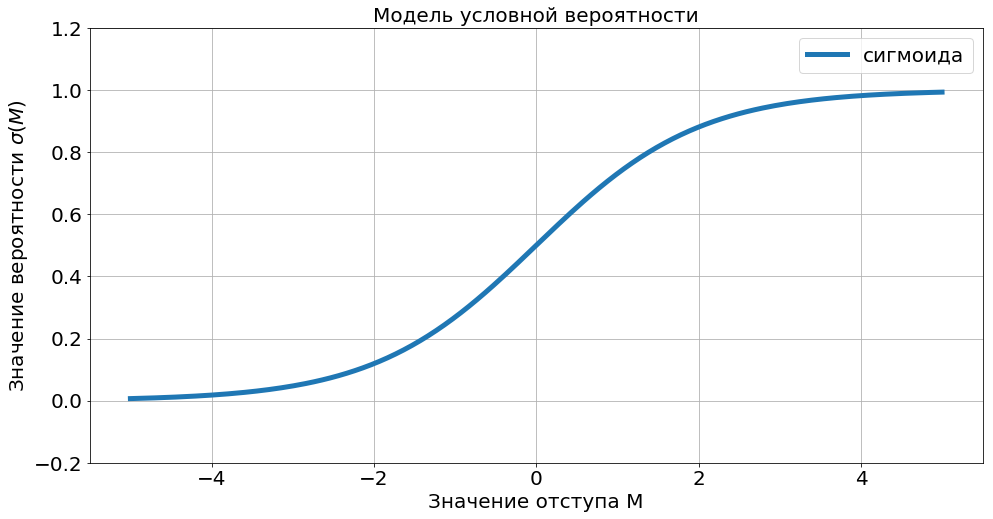

In [35]:
def sigmoid(x):
    return 1. / (1 + np.exp(-x))


plt.figure(figsize=(16, 8))
x = np.linspace(-5, 5, 200)
plt.plot(x, sigmoid(x), label='сигмоида', linewidth=5)
plt.ylim(-0.2, 1.2)
plt.grid()
plt.legend(fontsize=20), plt.title(u'Модель условной вероятности', fontsize=20)
plt.xticks(fontsize=20), plt.ylabel(u'Значение вероятности $\sigma(M)$', fontsize=20)
plt.yticks(fontsize=20), plt.xlabel(u'Значение отступа M', fontsize=20)
plt.show()

# Многоклассовая классификация

Модель логистической регрессии можно обобщить для случая многоклассовой классификации. Метка класса теперь лежит во множестве $\{1, 2, ..., K\}$. Параметры модели $w$ в этом случае являются матрицей размерности $K \times n$, где $n$ − количество признаков. Обучение модели логистической регрессии в многоклассовом случае будет выглядеть следующим образом:

$$ -\dfrac{1}{l}\sum_{i=1}^l \sum_{k=1}^K [y_i = k] \log\Big(\frac{\exp(\langle w_k, x_i \rangle)}{\sum_{s=1}^K \exp(\langle w_s, x_i \rangle))}\Big) \to \min_w$$

Здесь $w_k$ обозначает $k$-ую строку матрицы $w$.

Обучать эту модель также можно с помощью градиентного спуска.

Существует две общие популярные стратегии использования бинарных классификаторов для задачи многоклассовой классификации:
 - OvR (One-vs-Rest, One-vs-All) − стратегия, при которой каждый из $K$ классификаторов обучается отделять объекты одного класса от объектов всех остальных классов. В качестве предсказания используется тот класс, классификатор которого предсказал наибольшую вероятность среди всех.
 - OvO (One-vs-One) − стратегия, при которой каждый из $\frac{K(K-1)}{2}$ классификаторов учится разделять объекты пары классов, игнорируя объекты всех остальных классов. На этапе предсказания класс обычно выбирается путем голосования по вердиктам каждого из классификаторов.

# [Receiver Operating Characteristic](http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)

$$
sensivity = TPR = \dfrac{TP}{TP+FN}
$$

$$
specificity=TNR = \dfrac{TN}{TN+FP} 
$$
![](http://scikit-learn.org/stable/_images/sphx_glr_plot_roc_001.png)

# Модуль [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/optimize.html)

Включает в себя различные алгоритмы минимизации в том числе алгоритм градиентного спуска с различными эвристиками

[scipy.optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize)(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)

[Simple tutorial](https://people.duke.edu/~ccc14/sta-663/BlackBoxOptimization.html)

# Модуль [sklearn.linear_model](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)

### Регрессия:

- [ElasticNet](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet), [ElasticNetCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNetCV)
- [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
- [SGDRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

### Классификация:
- [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression), [LinearRegressionCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegressionCV)
- [SGDClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)

### Метрика качества:

- [sklearn.metrics.roc_curve](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)
- [sklearn.metrics.roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)

# Полезные ссылки:

[Статья на habrahabr](https://habrahabr.ru/company/ods/blog/323890/), внутри больше ссылок на популярные ресурсы.

[Про параметр fit_intercept](https://stackoverflow.com/questions/46779605/in-the-linearregression-method-in-sklearn-what-exactly-is-the-fit-intercept-par)

[Лекции Воронцова по линейным моделям](http://www.machinelearning.ru/wiki/images/6/68/voron-ML-Lin.pdf)